In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [43]:

claims = pd.read_csv('CLAIM DETAILS.csv', encoding='utf-8')
policies = pd.read_csv('POLICY DETAILS.csv', encoding='ISO-8859-1')
print(claims.columns)
print(policies.columns)


C:\Users\Charbel\AppData\Local\Temp\ipykernel_10900\1185848964.py:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  policies = pd.read_csv('POLICY DETAILS.csv', encoding='ISO-8859-1')


Index(['CUST_ID', 'DATE OF \r\nINTIMATION', 'DATE OF \r\nACCIDENT',
       'PLACE OF \r\nLOSS', 'CLAIM NO', 'AGE', 'TYPE',
       'DRIVING \r\nLICENSE ISSUE', 'BODY TYPE', 'MAKE', 'MODEL', 'YEAR',
       'CHASIS NO', 'REG', 'SUM INSURED', 'POLICY NO', 'POLICY START',
       'POLICY END', 'INTIMATED\r\nAMOUNT', 'INTIMATED\r\nSF', 'EXECUTIVE',
       'PRODUCT', 'POLICYTYPE', 'NATIONALITY'],
      dtype='object')
Index(['CUST_ID', 'EXECUTIVE', 'BODY', 'MAKE', 'MODEL', 'USE_OF_VEHICLE',
       'MODEL_YEAR', 'CHASSIS_NO', 'REGN', 'POLICY_NO', 'POL_EFF_DATE',
       'POL_EXPIRY_DATE', 'SUM INSURED', 'POL_ISSUE_DATE', 'PREMIUM2',
       'DRV_DOB', 'DRV_DLI', 'VEH_SEATS', 'PRODUCT', 'POLICYTYPE',
       'NATIONALITY'],
      dtype='object')


In [44]:
claims = claims.rename(columns={'POLICY NO': 'POLICY_NO'})

In [45]:
df_merged = pd.merge(policies, claims, on='POLICY_NO', how='outer')
print(df_merged.columns)

Index(['CUST_ID_x', 'EXECUTIVE_x', 'BODY', 'MAKE_x', 'MODEL_x',
       'USE_OF_VEHICLE', 'MODEL_YEAR', 'CHASSIS_NO', 'REGN', 'POLICY_NO',
       'POL_EFF_DATE', 'POL_EXPIRY_DATE', 'SUM INSURED_x', 'POL_ISSUE_DATE',
       'PREMIUM2', 'DRV_DOB', 'DRV_DLI', 'VEH_SEATS', 'PRODUCT_x',
       'POLICYTYPE_x', 'NATIONALITY_x', 'CUST_ID_y', 'DATE OF \r\nINTIMATION',
       'DATE OF \r\nACCIDENT', 'PLACE OF \r\nLOSS', 'CLAIM NO', 'AGE', 'TYPE',
       'DRIVING \r\nLICENSE ISSUE', 'BODY TYPE', 'MAKE_y', 'MODEL_y', 'YEAR',
       'CHASIS NO', 'REG', 'SUM INSURED_y', 'POLICY START', 'POLICY END',
       'INTIMATED\r\nAMOUNT', 'INTIMATED\r\nSF', 'EXECUTIVE_y', 'PRODUCT_y',
       'POLICYTYPE_y', 'NATIONALITY_y'],
      dtype='object')


In [46]:


# Assuming df_merged is your merged DataFrame
# ...

# List to store the differences
differences = []

# Iterate over columns
for col_x, col_y in zip(df_merged.filter(like='_x').columns, df_merged.filter(like='_y').columns):
    # Calculate unique values difference
    unique_values_diff = set(df_merged[col_x].dropna().unique()) - set(df_merged[col_y].dropna().unique())
    
    # Calculate NaNs difference
    nan_count_diff = df_merged[col_x].isna().sum() - df_merged[col_y].isna().sum()
    
    # Append differences to the list
    differences.append({
        'Column': col_x[:-2],  # Remove the '_x' suffix for better readability
        'Unique_Values_Diff': unique_values_diff,
        'NaN_Count_Diff': nan_count_diff
    })

# Create a DataFrame from the differences list
differences_df = pd.DataFrame(differences)

# Print or inspect the differences DataFrame
differences_df




,Column,Unique_Values_Diff,NaN_Count_Diff
0,CUST_ID,"{8192.0, 8194.0, 8196.0, 8197.0, 8199.0, 8200....",-184756
1,EXECUTIVE,"{UDASI/SA, MANOHAR, AJITHVP, UDASI, JOHN/AF, R...",-184756
2,MAKE,"{CAN, MIMA, CASE, YALE, HUMMER, FIAT, BUGATTI ...",-175115
3,MODEL,"{AMANTI, CLS350, LANCER EVOLUTION, M 235 I, TG...",-188746
4,SUM INSURED,"{0.0, 1.0, 32768.0, 65536.0, 98304.0, 196608.0...",-69134
5,PRODUCT,{},-184756
6,POLICYTYPE,{},-184756
7,NATIONALITY,"{LATVIAN, SAINT HELENIAN, COOK ISLAND, BELIZEA...",-24813


In [47]:
columns_to_merge = ['CUST_ID', 'EXECUTIVE', 'MAKE' , 'MODEL' , 'SUM INSURED' , 'PRODUCT', 'POLICYTYPE' , 'NATIONALITY']

for col in columns_to_merge:
    # Create a new column by combining '_x' and '_y' columns
    df_merged[col] = df_merged[f'{col}_x'].combine_first(df_merged[f'{col}_y'])

    # Drop the original '_x' and '_y' columns
    df_merged = df_merged.drop(columns=[f'{col}_x', f'{col}_y'])

# Print or inspect the DataFrame
df_merged

,BODY,USE_OF_VEHICLE,MODEL_YEAR,CHASSIS_NO,REGN,POLICY_NO,POL_EFF_DATE,POL_EXPIRY_DATE,POL_ISSUE_DATE,PREMIUM2,DRV_DOB,DRV_DLI,VEH_SEATS,DATE OF \r\nINTIMATION,DATE OF \r\nACCIDENT,PLACE OF \r\nLOSS,CLAIM NO,AGE,TYPE,DRIVING \r\nLICENSE ISSUE,BODY TYPE,YEAR,CHASIS NO,REG,POLICY START,POLICY END,INTIMATED\r\nAMOUNT,INTIMATED\r\nSF,CUST_ID,EXECUTIVE,MAKE,MODEL,SUM INSURED,PRODUCT,POLICYTYPE,NATIONALITY
0,SALOON,PRIVATE,2004.0,4T1BF28B74U386791,DUBAI,102048936,24/02/2015,23/02/2016,04/01/2015 8:14,1090.0,NaN,NaN,4.0,18/03/2015 9:07,11/03/2015,DUBAI,DU/10/PC/COMP/2328/15,26.0,OD Claim,01/01/1900,SALOON,2004.0,4T1BF28B74U386791,DUBAI,24/02/2015,23/02/2016,550.0,0.0,749.0,JAIKISHIN (S),TOYOTA,AVALON,14080.0,NOT CLASSIFIED,COMP,NaN
1,SALOON,PRIVATE,2004.0,4T1BF28B74U386791,DUBAI,102048936,24/02/2015,23/02/2016,04/01/2015 8:14,1090.0,NaN,NaN,4.0,24/06/2015 17:01,15/06/2015,DUBAI,DU/10/PC/COMP/0922/16,31.0,RECOVERY CLAIM,22/11/2011,SALOON,2004.0,4T1BF28B74U386791,DUBAI,24/02/2015,23/02/2016,900.0,0.0,749.0,JAIKISHIN (S),TOYOTA,AVALON,14080.0,NOT CLASSIFIED,COMP,NaN
2,SALOON,PRIVATE,2004.0,4T1BF28B74U386791,DUBAI,102048936,24/02/2015,23/02/2016,04/01/2015 8:14,1090.0,NaN,NaN,4.0,07/01/2016 11:27,11/03/2015,DUBAI,DU/10/PC/COMP/5818/16,26.0,TP Claim,01/01/1900,SALOON,2004.0,4T1BF28B74U386791,DUBAI,24/02/2015,23/02/2016,1700.0,NaN,749.0,JAIKISHIN (S),TOYOTA,AVALON,14080.0,NOT CLASSIFIED,COMP,NaN
3,SALOON,PRIVATE,2004.0,4T1BF28B74U386791,DUBAI,102048936,24/02/2015,23/02/2016,04/01/2015 8:14,1090.0,NaN,NaN,4.0,14/03/2016 16:14,11/03/2015,DUBAI,OMIT,26.0,TP Claim,01/01/1900,SALOON,2004.0,4T1BF28B74U386791,DUBAI,24/02/2015,23/02/2016,0.0,NaN,749.0,JAIKISHIN (S),TOYOTA,AVALON,14080.0,NOT CLASSIFIED,COMP,NaN
4,PICK UP,COMMERCIAL,2004.0,JL7BCE1K44K002036,DUBAI,101509203,10/02/2015,09/02/2016,04/01/2015 8:15,930.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,749.0,JAIKISHIN (S),MITSUBISHI,CANTER SINGLE CABIN,0.0,NOT CLASSIFIED,TP,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249656,NaN,NaN,NaN,NaN,NaN,102042682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30/09/2018 11:07,06/02/2014,DUBAI,DU/10/PCV/COMP/4094/19,40.0,TP Claim,01/01/1900,VAN,2007.0,JN6FE52S57X421878,DUBAI,16/11/2013,15/11/2014,917.0,NaN,250.0,JAIKISHIN (SNC),NISSAN,E 25 VAN,17600.0,NOT CLASSIFIED,COMP,PAKISTANI
249657,NaN,NaN,NaN,NaN,NaN,101505111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,07/08/2019 10:49,28/05/2013,SHARJAH,DU/10/MCY/TP/1955/20,0.0,TP Claim Ins,01/01/1900,MOTOR CYCLE,2012.0,MD2DDDUZZVW80161,TBR,18/09/2012,17/10/2013,3000.0,NaN,3109.0,MANOHAR (S),BAJAJ,CT100,NaN,NOT CLASSIFIED,TP,PAKISTANI
249658,NaN,NaN,NaN,NaN,NaN,102041951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,07/08/2019 11:03,29/04/2014,DUBAI,DU/10/PC/COMP/1956/20,0.0,TP Claim Ins,01/01/1900,SALOON,2007.0,JMYSRCS1A7U729899,DUBAI,12/08/2013,11/08/2014,3600.0,NaN,2245.0,MANOHAR (S),MITSUBISHI,LANCER,12000.0,NOT CLASSIFIED,COMP,PAKISTANI
249659,NaN,NaN,NaN,NaN,NaN,102046700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24/06/2020 8:55,19/10/2014,DUBAI,DU/10/PCV/COMP/0627/21,0.0,TP Claim Ins,01/01/1900,PICK UP,2011.0,MR0EW12G2B2030176,DUBAI,29/09/2014,28/09/2015,3780.0,NaN,6764.0,AJITH,TOYOTA,HILUX,32000.0,NOT CLASSIFIED,COMP,PAKISTANI


) missing from current font.ming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


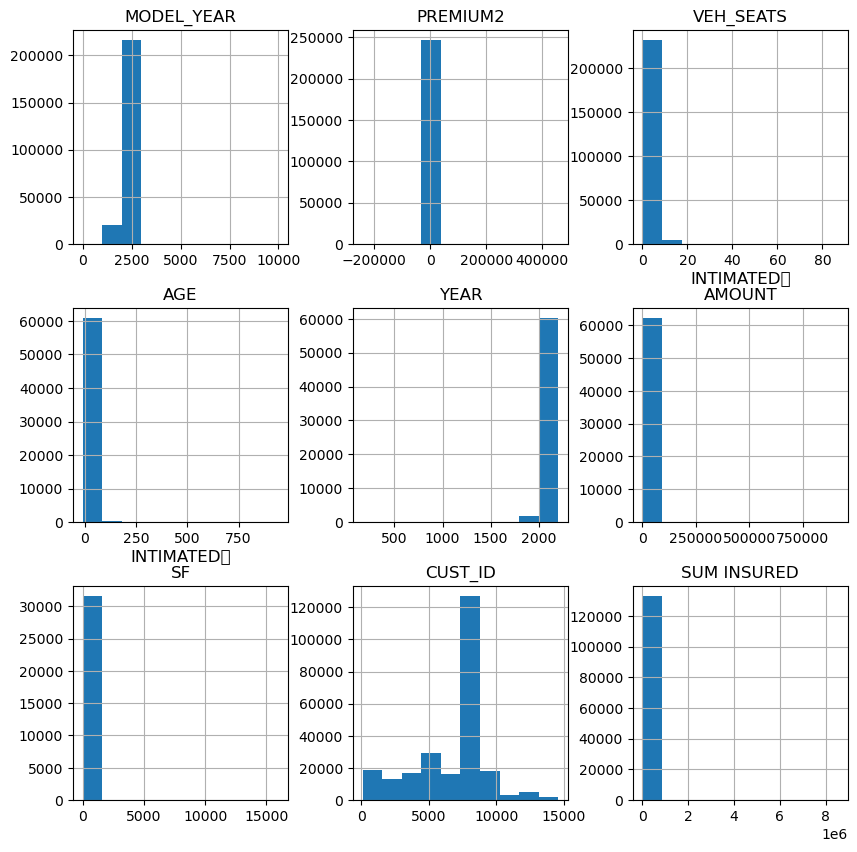

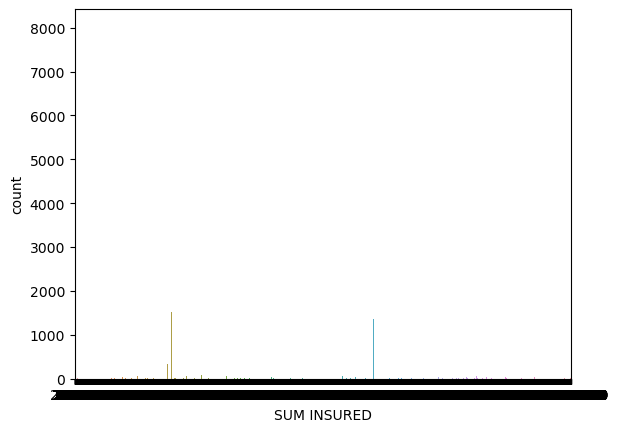

In [48]:
# Plot histograms for numerical columns
df_merged.hist(figsize=(10, 10))
plt.show()

# Plot count plots for categorical columns
sns.countplot(x='SUM INSURED', data=df_merged)
plt.show()


In [ ]:
#MODEL_YEAR cleaning
df_merged['MODEL_YEAR'].mean()
print(df_merged[df_merged['MODEL_YEAR'] == 2010].count())
#8000 row have 2010 as model year

In [ ]:
import random

# Assuming df_merged is your merged DataFrame
# Replace missing values in 'MODEL_YEAR' with the mean of the column
mean_model_year = df_merged['MODEL_YEAR'].mean()
df_merged['MODEL_YEAR'] = df_merged['MODEL_YEAR'].fillna(mean_model_year)

# Define the range around the mean
range_around_mean = 5
min_model_year = 1950
max_model_year = 2022

# Define a list of random values within the specified range around the mean
random_values = list(range(int(mean_model_year - range_around_mean), int(mean_model_year + range_around_mean) + 1))

# Function to replace values outside the desired range with a random value
def replace_outside_range(x):
    if pd.isnull(x) or x < min_model_year or x > max_model_year:
        return random.choice(random_values)
    else:
        return x

# Apply the function to the 'MODEL_YEAR' column
df_merged['MODEL_YEAR'] = df_merged['MODEL_YEAR'].apply(replace_outside_range)

# Print or inspect the DataFrame to verify changes
print(df_merged)



In [ ]:
print(df_merged[df_merged['MODEL_YEAR'] == 2010].count())
print(df_merged['MODEL_YEAR'].isna().sum())
#now Model_YEar is clean

In [78]:
#for premium
df_merged['PREMIUM2'].describe()
print(df_merged.PREMIUM2.isna().sum())

2388


In [80]:
#transform all negative values into positive
# Assuming df_merged is your merged DataFrame

# Function to transform negative values to positive
def transform_negative_premium(x):
    return abs(x)  

# Apply the function to the 'PREMIUM' column
df_merged['PREMIUM2'] = df_merged['PREMIUM2'].apply(transform_negative_premium)




In [ ]:
# Assuming df_merged is your merged DataFrame

# Calculate the mean of the 'PREMIUM' column
mean_premium = df_merged['PREMIUM2'].mean()

# Replace values less than 200 with NaN
df_merged['PREMIUM2'] = np.where((df_merged['PREMIUM2'] < 200) | (df_merged['PREMIUM2'] == 0), np.nan, df_merged['PREMIUM2'])

# Fill NaN values with the mean of the column
df_merged['PREMIUM2'] = df_merged['PREMIUM2'].fillna(mean_premium)

print(df_merged.PREMIUM2.isna().sum())

print(df_merged.PREMIUM2.describe())

In [103]:
#veh seats
print(df_merged['VEH_SEATS'].describe())
df_merged[df_merged.VEH_SEATS == 0]
#it looks like most records with 0 vehicle seats are either forklifters or motorcycles so I will change them to 1
print(df_merged.VEH_SEATS.isna().sum())
#we have 12 000 na rows
df_merged[df_merged.VEH_SEATS == 3]

count    237009.000000
mean          4.453067
std           3.340384
min           0.000000
25%           4.000000
50%           4.000000
75%           4.000000
max          87.000000
Name: VEH_SEATS, dtype: float64
12652


,BODY,USE_OF_VEHICLE,MODEL_YEAR,CHASSIS_NO,REGN,POLICY_NO,POL_EFF_DATE,POL_EXPIRY_DATE,POL_ISSUE_DATE,PREMIUM2,DRV_DOB,DRV_DLI,VEH_SEATS,DATE OF \r\nINTIMATION,DATE OF \r\nACCIDENT,PLACE OF \r\nLOSS,CLAIM NO,AGE,TYPE,DRIVING \r\nLICENSE ISSUE,BODY TYPE,YEAR,CHASIS NO,REG,POLICY START,POLICY END,INTIMATED\r\nAMOUNT,INTIMATED\r\nSF,CUST_ID,EXECUTIVE,MAKE,MODEL,SUM INSURED,PRODUCT,POLICYTYPE,NATIONALITY
64,SPORTS CAR,PRIVATE,2010.0,1ZVBP8EN4A5107948.,DUBAI,102048979,05/01/2015,04/02/2016,05/01/2015 13:32,1712.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7134.0,BR,FORD,MUSTANG,44000.0,STANDARD,COMP,NaN
101,SALOON,PRIVATE,2008.0,WP0ZZZ99Z8S722946,DUBAI,102049002,10/01/2015,09/01/2016,06/01/2015 9:58,4040.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5445.0,ASHOK,PORSCHE,CARRERA,126000.0,NOT CLASSIFIED,COMP,NaN
132,COUPE,PRIVATE,2012.0,WDDKK5KF7CF138966,DUBAI,102049022,06/01/2015,05/02/2016,06/01/2015 16:03,4665.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7650.0,JOHN,MERCEDES,E350,135000.0,STANDARD,COMP,NaN
152,SALOON,PRIVATE,2004.0,WDBTK65G04T033356,DUBAI,101509224,07/01/2015,06/02/2016,07/01/2015 9:12,1210.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5568.0,BR,MERCEDES,CLK-320,NaN,TP,TP,NaN
242,SALOON,PRIVATE,2009.0,WP0ZZZ99Z9S700350,DUBAI,102049092,17/02/2015,16/02/2016,11/01/2015 9:33,4160.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3609.0,JAIKISHIN,PORSCHE,CARRERA,120000.0,NOT CLASSIFIED,COMP,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246854,COUPE,PRIVATE,2015.0,SCBFN6ZA2FC044067,DUBAI,102153246,28/02/2021,30/03/2022,22/12/2020 11:52,6187.0,01/01/2000,01/01/1970,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11997.0,JAIKISHIN (S),BENTLEY,CONTINENTAL COUPE,294400.0,M 2.25,COMP,EMIRATE
246985,SPORTS CAR,PRIVATE,2014.0,SCBGN2ZA4EC088647,DUBAI,102153347,29/12/2020,28/01/2022,24/12/2020 10:04,5267.0,12/11/2010,01/01/1970,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4522.0,AMIT,BENTLEY,CONTINENTAL GTC V8,191890.0,M 2.5,COMP,COMPANY
246999,COUPE,PRIVATE,2015.0,WMWXM5101F3A15130,DUBAI,102153361,29/12/2020,28/01/2022,24/12/2020 11:28,1390.0,13/02/2014,31/08/1985,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9446.0,MANOHAR,MINI,COOPER,34000.0,STANDARD,COMP,INDIAN
247078,SALOON,PRIVATE,2014.0,WP0ZZZ97ZEL001269,DUBAI,102153428,27/12/2020,26/01/2022,27/12/2020 17:51,1992.0,10/11/2001,18/09/1983,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4267.0,BR,PORSCHE,PANAMERA,111200.0,M 2019,COMP,INDIAN


In [114]:
df_merged.BODY.isna().sum()
# Assuming df_merged is your merged DataFrame

# Drop all rows where 'BODY' is NaN
df_merged = df_merged.dropna(subset=['BODY'])



In [128]:
# Assuming df_merged is your merged DataFrame

# Create a mapping dictionary with 'BODY' as keys and corresponding max 'VEH_SEATS' as values
max_seats_mapping = df_merged.groupby('BODY')['VEH_SEATS'].max().to_dict()

# Replace 'VEH_SEATS' values of 0 with 1 in the mapping dictionary
max_seats_mapping = {key: 1 if value == 0 else value for key, value in max_seats_mapping.items()}


# Print or inspect the DataFrame
max_seats_mapping




{'4 WD': 87.0,
 'AMPHIBIOUS BUS': 45.0,
 'AS PER FLEET LIST': 6.0,
 'BUS': 83.0,
 'CARAVAN': 8.0,
 'CHILLER VAN': 3.0,
 'CONVERTIBLE': 4.0,
 'COUPE': 4.0,
 'CRANE': 1.0,
 'DOOR COUPE': 3.0,
 'DOUBLE CABIN': 5.0,
 'DRILL': 1.0,
 'DUMP TRUCK': 2.0,
 'EXCAVATOR': 1.0,
 'FORK LIFT': 1.0,
 'FREEZER PICK-UP': 6.0,
 'FREEZER TRUCK': 2.0,
 'FREEZER VAN': 14.0,
 'HATCH BACK': 6.0,
 'HEAVY TRUCK': 1.0,
 'JEEP': 4.0,
 'LIGHT PICKUP': 14.0,
 'LIMOUSINE': 14.0,
 'LOADER': 1.0,
 'LUXURY PICKUP': 7.0,
 'MICRO BUS 15 Seats': 14.0,
 'MINI BUS': 60.0,
 'MINI TRUCK': 1.0,
 'MINI VAN': 62.0,
 'MOTOR BIKE': 1.0,
 'MOTOR CYCLE': 4.0,
 'MOTOR GRADER': 1.0,
 'MOTOR HOME': 7.0,
 'MOTOR TRICYCLE': 3.0,
 'MPV': 8.0,
 'PICK UP': 14.0,
 'PICK UP (REEFER BODY)': 2.0,
 'PICK UP DOUBLE CABIN': 6.0,
 'PICK UP TRUCK': 6.0,
 'PICK UP WITH BOX': 6.0,
 'PICK UP WITH CRANE': 6.0,
 'PICKUP WITH BOX & TAIL LIFT': 2.0,
 'PICKUP WITH TIPPER': 2.0,
 'PIPELAYER': 1,
 'QUAD BIKE': 1.0,
 'RECOVERY VEHICLE': 2.0,
 'REFRIGERATED PIC

{'4 WD': 87.0,
 'AMPHIBIOUS BUS': 45.0,
 'AS PER FLEET LIST': 6.0,
 'BUS': 83.0,
 'CARAVAN': 8.0,
 'CHILLER VAN': 3.0,
 'CONVERTIBLE': 4.0,
 'COUPE': 4.0,
 'CRANE': 1.0,
 'DOOR COUPE': 3.0,
 'DOUBLE CABIN': 5.0,
 'DRILL': 1.0,
 'DUMP TRUCK': 2.0,
 'EXCAVATOR': 1.0,
 'FORK LIFT': 1.0,
 'FREEZER PICK-UP': 6.0,
 'FREEZER TRUCK': 2.0,
 'FREEZER VAN': 14.0,
 'HATCH BACK': 6.0,
 'HEAVY TRUCK': 1.0,
 'JEEP': 4.0,
 'LIGHT PICKUP': 14.0,
 'LIMOUSINE': 14.0,
 'LOADER': 1.0,
 'LUXURY PICKUP': 7.0,
 'MICRO BUS 15 Seats': 14.0,
 'MINI BUS': 60.0,
 'MINI TRUCK': 1.0,
 'MINI VAN': 62.0,
 'MOTOR BIKE': 1.0,
 'MOTOR CYCLE': 4.0,
 'MOTOR GRADER': 1.0,
 'MOTOR HOME': 7.0,
 'MOTOR TRICYCLE': 3.0,
 'MPV': 8.0,
 'PICK UP': 14.0,
 'PICK UP (REEFER BODY)': 2.0,
 'PICK UP DOUBLE CABIN': 6.0,
 'PICK UP TRUCK': 6.0,
 'PICK UP WITH BOX': 6.0,
 'PICK UP WITH CRANE': 6.0,
 'PICKUP WITH BOX & TAIL LIFT': 2.0,
 'PICKUP WITH TIPPER': 2.0,
 'PIPELAYER': 0.0,
 'QUAD BIKE': 1.0,
 'RECOVERY VEHICLE': 2.0,
 'REFRIGERATED P

In [129]:
import numpy as np

# Assuming df_merged is your merged DataFrame

# Create a mapping dictionary with 'BODY' as keys and corresponding max 'VEH_SEATS' as values


# Fill NaN and 0 values in 'VEH_SEATS' with the corresponding max value based on 'BODY'
df_merged['VEH_SEATS'] = df_merged.apply(lambda row: max_seats_mapping.get(row['BODY']) if pd.isna(row['VEH_SEATS']) or row['VEH_SEATS'] == 0 else row['VEH_SEATS'], axis=1)


# Print or inspect the DataFrame to verify changes
print(df_merged.VEH_SEATS.isna().sum())
print(df_merged.VEH_SEATS.describe())




0
count    236827.000000
mean          4.543544
std           3.815773
min           1.000000
25%           4.000000
50%           4.000000
75%           4.000000
max          87.000000
Name: VEH_SEATS, dtype: float64


C:\Users\Charbel\AppData\Local\Temp\ipykernel_10900\3852985989.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged['VEH_SEATS'] = df_merged.apply(lambda row: max_seats_mapping.get(row['BODY']) if pd.isna(row['VEH_SEATS']) or row['VEH_SEATS'] == 0 else row['VEH_SEATS'], axis=1)
